In [53]:
initial_dna_sequence = list("A9B6C9D6E9F6G9H6I9J6K")
forward_9_positions=[1,5,9,13,17]#computer positions
    
backward_6_positions=[3,7,11,15,19]#computer positions

In [54]:
def prime(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        if inverse_composite[i]=='6':
            inverse_composite[i]='9'
        elif inverse_composite[i]=='9':
            inverse_composite[i]='6'
        elif inverse_composite[i].islower():
            inverse_composite[i]=inverse_composite[i].upper()
        elif inverse_composite[i].isupper():
            inverse_composite[i]=inverse_composite[i].lower()
        else:
            raise SyntaxError
    return inverse_composite

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+prime(DNA[site_1-1:site_2])+DNA[site_2:] 

import random

def evaluate_colour_CRE(DNA):
    forward_9_positions=detect_forward_sites(DNA,['9'])
    backward_6_positions=detect_backward_sites(DNA,['6'])
    # Randomly select two sites
    combined = [(num, 'forward') for num in forward_9_positions] + [(num, 'backward') for num in backward_6_positions]
    if len(combined)<2:
        return(DNA)#check here
    choice1,choice2 = random.sample(combined, k=2)
    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
    
    # Determine which function to use
    #Not yet complete,must know if <> is a flip
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            return delete_between(DNA,num1+1,num2)
        elif direction_1!=direction_2:
            return DNA#evaluate_colour_CRE(DNA,forward_9_positions,backward_6_positions)

In [55]:
for i in range(10):
    #print(evaluate_colour_CRE(initial_dna_sequence,forward_9_positions,backward_6_positions))
    print("".join(evaluate_colour_CRE(initial_dna_sequence)))
    #print("---------")

A9B6C9D6E9F6G9H6I9J6K
A9B6C9D6E9F6G9J6K
A9B6C9D6E9F6G9J6K
A9B6C9D6E9F6G9H6K
A9f6e9d6c9b6G9H6I9J6K
A9B6C9D6E9F6G9H6I9J6K
A9B6K
A9B6C9f6e9d6G9H6I9J6K
A9H6I9J6K
A9B6C9H6I9J6K


In [65]:
def monte_carlo_probability_estimation(DNA, num_simulations=10000,num_recombinases_events=7):
    # Dictionary to store counts of each outcome
    outcome_counts = {}
    
    # Run simulations
    

    for _ in range(num_simulations):
        output=DNA
        for i in range (num_recombinases_events):
            output = evaluate_colour_CRE(output)
        formatted_output = "".join(output)
        if formatted_output not in outcome_counts:
            outcome_counts[formatted_output] = 1
        outcome_counts[formatted_output] += 1
    
    # Calculate probabilities
    probabilities = {outcome: count / num_simulations 
                     for outcome, count in outcome_counts.items()}
    
    return probabilities, outcome_counts

In [ ]:
def probability_calculation(DNA, num_simulations=10000,num_recombinases_events=7):
    # Dictionary to store counts of each outcome
    outcome_counts = {}
    outcome_list=[]
    # Run simulations
    
    for output in outcome_list:
        for _ in range(num_simulations):
        output = evaluate_colour_CRE(output)
        formatted_output = "".join(output)  
        if formatted_output not in outcome_counts:
            outcome_counts[formatted_output] = 1
            outcome_list.append(output)
        outcome_counts[formatted_output] += 1
        
    # Calculate probabilities
    probabilities = {outcome: count / num_simulations 
                     for outcome, count in outcome_counts.items()}
    
    return probabilities, outcome_counts

In [71]:
data={}
for i in range(9):
    probabilities,outcome_counts= monte_carlo_probability_estimation(initial_dna_sequence,num_simulations=10000000,num_recombinases_events=i+1)
    print(len(outcome_counts))
    data[i]=len(outcome_counts)


46
676
6668
38898
76533
101602
113916
113418
103253


In [ ]:
data={1:46,2:676,3:6668,4:38898,5:76533,6:101602,7:113916,8:113418,9:103253}


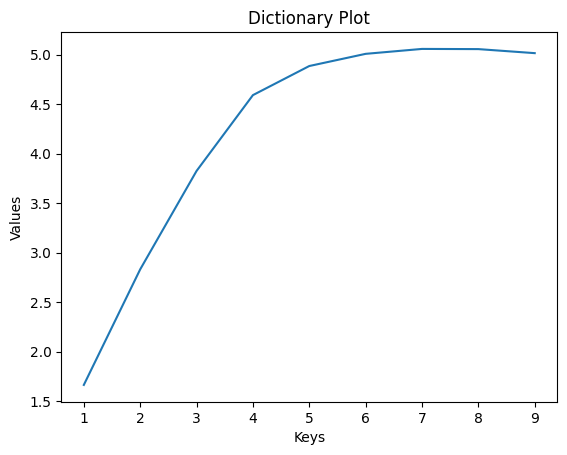

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Extract keys (x-axis) and values (y-axis)
x = list(data.keys())
y = np.log10(list(data.values()))

# Create a bar plot (or line plot)
plt.plot(x, y)  # For a bar chart
# plt.plot(x, y, marker='o')  # For a line plot with markers

# Add labels and title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Dictionary Plot')

# Show the plot
plt.show()